<div style="text-align:center">
  <h1>Spatial Economics</h1>
  <h1>Assignment 1</h1>
  <h3>727178</h3>
  <h3>703308</h3>
  <h3>TI</h3>
</div>

This file gives explanations to the results additional to the code for replicability.

<div style="text-align:center">
  <h4>Introduction</h4>
</div>

Small intro regarding project

In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

<div style="text-align:center">
  <h4>Exercise 1</h4>
</div>
Solve the model for the parametrization of the model that is assigned to your group. Describe
the equilibrium or equilibria graphically as well as in words, paying explicit attention to the
stability of the equilibria. Consider the effect of varying transport costs by constructing and
describing a graph similar to Figure 4.2 in the book (the so-called wiggle diagram). Describe
the comparative statics characteristics of the model with respect to transport costs in your own
words. Make sure that you vary the transport costs in such a way that all interesting type of
equilibria are found and can be described. 

In [ ]:
def solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam,T):
    def equations(p):
            Y1, Y2, W1, W2, I1, I2 = p
            return(Y1-phi1*(1-gam)*L-lam*gam*L*W1,
                Y2-(1-phi1)*(1-gam)*L-(1-lam)*gam*L*W2,
                W1-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(Y1*I1**(eps-1)+T**(1-eps)*Y2*I2**(eps-1))**(1/eps),
                W2-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(T**(1-eps)*Y1*I1**(eps-1)+Y2*I2**(eps-1))**(1/eps),
                I1-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*W1**(1-eps)+(1-lam)*T**(1-eps)*W2**(1-eps))**(1/(1-eps)),
                I2-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*T**(1-eps)*W1**(1-eps)+(1-lam)*W2**(1-eps))**(1/(1-eps)))

    Y1, Y2, W1, W2, I1, I2 = fsolve(equations, (1, 1, 1, 1, 1, 1),xtol=1e-10)
    Rel = (W1/I1**delta)/(W2/I2**delta)
    Welf = Y1/(I1**delta)+Y2/(I2**delta)
    Man_H=W1/I1**delta
    Man_F=W2/I2**delta
    Farm_H=1/I1**delta
    Farm_F=1/I2**delta
    return Rel, Welf, Man_H, Man_F, Farm_H, Farm_F

def run_CP_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L, T):
    #print ("T is equal to", T)
    VRelative = np.zeros(len(lam_values))
    VWelfare = np.zeros(len(lam_values))
    VW_Man_H = np.zeros(len(lam_values))
    VW_Man_F = np.zeros(len(lam_values))
    VW_Farm_H = np.zeros(len(lam_values))
    VW_FRamF = np.zeros(len(lam_values))

    for lamh in range (len(lam_values)):
        #given specific lambda value the values are calculated and stored
        VRelative[lamh], VWelfare[lamh], VW_Man_H[lamh], VW_Man_F[lamh], VW_Farm_H[lamh], VW_FRamF[lamh] = solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam_values[lamh],T)

    return VWelfare, VRelative, VW_Man_H, VW_Man_F, VW_Farm_H, VW_FRamF

def check_stability(Relative, T, indx, lamh_min, lamh_max, lamh_div, prec, file, T_lambda, T_T, T_Stab):
    # Main loop to check points near Rel=1
    for x in range(1, len(Relative)):  # start from x=1 to avoid x-1 = -1
        y = x-1
        if 1 - prec <= Relative[x] <= 1 + prec:
            axis = x / lamh_div + lamh_min / lamh_div
            stability = 0 if Relative[x] > Relative[y] else 1  # 0 = unstable, 1 = stable

            file.write(f"{T}: {indx}: {axis}\n")
            T_lambda.append(axis)
            T_T.append(T)
            T_Stab.append(stability)

    # Boundary condition at lamh_min
    if Relative[0] < 1:
        axis = 0.0
        file.write(f"{T}: {indx}: {axis}\n")
        T_lambda.append(axis)
        T_T.append(T)
        T_Stab.append(1)  # stable by assumption
    else:
        T_lambda.append(0)
        T_T.append(T)
        T_Stab.append(0)

    # Boundary condition at lamh_max
    if Relative[lamh_max - lamh_min - 1] > 1:
        axis = 1.0
        file.write(f"{T}: {indx}: {axis}\n")
        T_lambda.append(axis)
        T_T.append(T)
        T_Stab.append(1)  # stable by assumption
    else:
        T_lambda.append(1)
        T_T.append(T)
        T_Stab.append(0)

    return T_lambda, T_T, T_Stab


def run_varying_specific_parameter(varying_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T, type_vary):
    # for a given parameter to vary, run model and store results, ex for ex 1 varying_values = Th_values
    fig = plt.figure()
    n_T = len(varying_values)
    n_lambda = len(lam_values)

    Relative_matrix = np.zeros((n_T, n_lambda))
    Welfare_matrix = np.zeros((n_T, n_lambda))
    W_Man_H_matrix = np.zeros((n_T, n_lambda))
    W_Man_F_matrix = np.zeros((n_T, n_lambda))
    W_Farm_H_matrix = np.zeros((n_T, n_lambda))
    W_Farm_F_matrix = np.zeros((n_T, n_lambda))

    for i in range (len(varying_values)):
        if type_vary == 1: # Th
            Welfare_matrix[i, :], Relative_matrix[i, :], W_Man_H_matrix[i, :], W_Man_F_matrix[i, :], W_Farm_H_matrix[i, :], W_Farm_F_matrix[i, :] = run_CP_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L,varying_values[i])
            #T_lambda, T_T, T_Stab = check_stability(Relative_matrix[i, :], varying_values[i], indx, lamh_min, lamh_max, lamh_div, prec, file, T_lambda, T_T, T_Stab)
        if type_vary == 2: # phi
            Welfare_matrix[i, :], Relative_matrix[i, :], W_Man_H_matrix[i, :], W_Man_F_matrix[i, :], W_Farm_H_matrix[i, :], W_Farm_F_matrix[i, :] = run_CP_model(lam_values,varying_values[i],gam,rho,bet,delta,alp,eps,L,T)
        if type_vary == 3: # eps
            Welfare_matrix[i, :], Relative_matrix[i, :], W_Man_H_matrix[i, :], W_Man_F_matrix[i, :], W_Farm_H_matrix[i, :], W_Farm_F_matrix[i, :] = run_CP_model(lam_values,phi1,gam,rho,bet,delta,alp,varying_values[i],L,T)
    return Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix
    

In [74]:
def plot_selected(lam_values, all_values_selected, matrix, selected_indices, name_yaxis, name_selected, name_matrix):
    plt.figure(figsize=(8, 6))
    
    colors = ['black', 'blue', 'red', 'green', 'orange']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    
    for plot_idx, idx in enumerate(selected_indices):
        plt.plot(lam_values, matrix[idx, :],
                 label=f'%s = {all_values_selected[idx]}'%name_selected,
                 color=colors[plot_idx],
                 linestyle=linestyles[plot_idx])
    if name_selected == 'T':
        plt.axhline(1, color='grey', linestyle='--', linewidth=0.8)
    plt.xlabel('λ (lambda)')
    plt.ylabel(name_yaxis)
    plt.title('Wiggle Diagram (Selected %s Values) for %s'%(name_selected,name_matrix))
    plt.legend(title='Plot for Different %s Values'%name_selected)
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

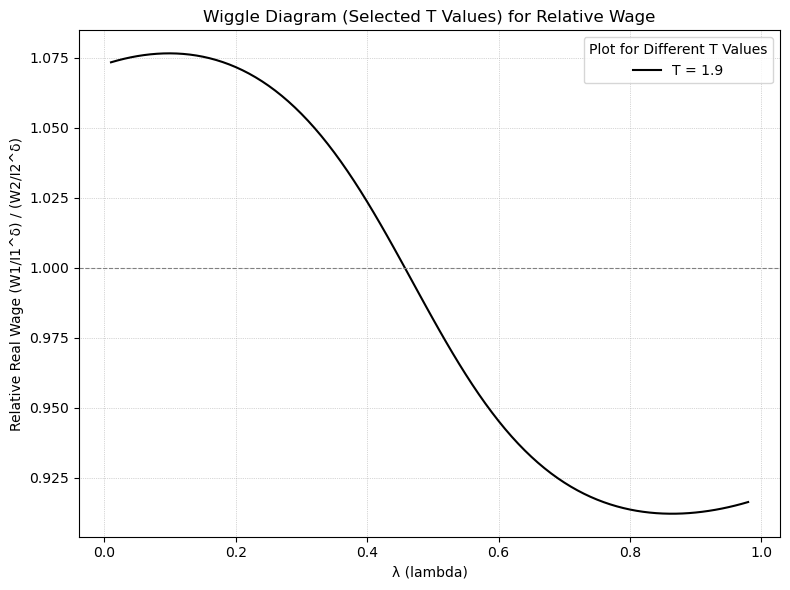

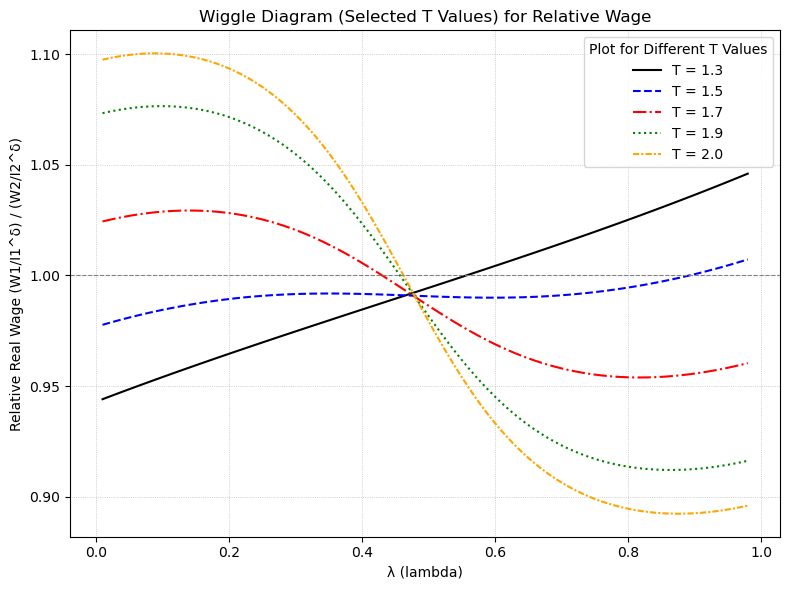

In [85]:
#Group 2: Τ = 1.9. 

phi1=0.48
# phi2=0.6
gam=0.3
L=2.0
eps=5.0
rho=0.75        #changed for gr2
bet=0.8
alp=0.08
delta=0.35      #changed for gr2
T = 1.9
T_lambda = []
T_T = []
T_Stab=[]
fig = plt.figure()
lines = ["-","--","-.",":","+","."]
color = ["Black","Green","Red","Yellow","Purple","Grey"]
colstab = ["Red","Black"]
file = open("Results.txt","w")

# Define number of iterations T and lambda
Th_min=130
Th_max=201 
Th_step=1
Th_div=100

lamh_min=1
lamh_max=99
lamh_step=1
lamh_div=100

Th_values = np.arange(Th_min, Th_max, Th_step) / Th_div
lam_values = np.arange(lamh_min, lamh_max, lamh_step) / lamh_div

type_varying = 1 # in order to use the different Th values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(Th_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T,type_varying)

selected_T_values = [1.9]
selected_T_indices = [np.argmin(np.abs(Th_values - T_sel)) for T_sel in selected_T_values]
#plot_selected(lam_values, Th_values, Relative_matrix, selected_T_indices)
plot_selected(lam_values, Th_values, Relative_matrix, selected_T_indices, 'Relative Real Wage (W1/I1^δ) / (W2/I2^δ)', 'T', 'Relative Wage')

selected_T_values = [1.3, 1.5, 1.7, 1.9, 2.1]
selected_T_indices = [np.argmin(np.abs(Th_values - T_sel)) for T_sel in selected_T_values]
plot_selected(lam_values, Th_values, Relative_matrix, selected_T_indices, 'Relative Real Wage (W1/I1^δ) / (W2/I2^δ)', 'T', 'Relative Wage')


<div style="text-align:center">
  <h4>Exercise 2 The role of farmers</h4>
</div>
Farmers play an important role in the core-periphery model although their role oftentimes
remains somewhat underexposed in the discussion of the model. In this exercise, you will study
in some more detail the role of farmers in the core-periphery model.

a. All results derived in the book by Brakman et al. are based on the assumption that
agricultural workers are evenly distributed over the two regions ($\phi_1=\phi_2=0.5$). Solve
the model under the alternative assumption that $\phi_1$ = 0.55 (and thus $\phi_2$ = 0.45).
Describe the resulting equilibrium/equilibria. Explain the effect of introducing asymmetry
in the allocation of farmers on the equilibrium outcome of the model in words. Provide
the economic intuition.

b. Characteristic for the development of modern economies over time is the shrinking of the
agricultural sector. Explain which parameter you need to vary to capture the shrinking of
the agricultural sector. Take the benchmark parametrization for your group and show the
effect of a shrinking share of farmers on the equilibrium outcome of the model (including
a description of the impact on welfare). Describe the effects in words and provide the
economic intuition. 

In [86]:
def plot_CP_results(lam_values, 
                    VRelative_5, VRelative_55,
                    VWelfare_5, VWelfare_55,
                    VW_Man_H_5, VW_Man_H_55,
                    VW_Man_F_5, VW_Man_F_55,
                    VW_Farm_H_5, VW_Farm_H_55,
                    VW_Farm_F_5, VW_Farm_F_55):
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Relative Wages (Home/Foreign)
    axs[0, 0].plot(lam_values, VRelative_5, label=r'$\phi_1 = 0.5$', color='blue')
    axs[0, 0].plot(lam_values, VRelative_55, label=r'$\phi_1 = 0.55$', color='red', linestyle='--')
    axs[0, 0].set_title('Relative Wage: Home / Foreign')
    axs[0, 0].set_xlabel('λ (lambda)')
    axs[0, 0].set_ylabel('w_H / w_F')
    axs[0, 0].legend()
    
    # Plot 2: Welfare in Home and Foreign (Total Welfare per region)
    axs[0, 1].plot(lam_values, VWelfare_5, label=r'$\phi_1 = 0.5$', color='blue')
    axs[0, 1].plot(lam_values, VWelfare_55, label=r'$\phi_1 = 0.55$', color='red', linestyle='--')
    axs[0, 1].set_title('Welfare per Region (Total)')
    axs[0, 1].set_xlabel('λ (lambda)')
    axs[0, 1].set_ylabel('Welfare Index')
    axs[0, 1].legend()
    
    # Plot 3: Manufacturing Share (Home and Foreign)
    axs[1, 0].plot(lam_values, VW_Man_H_5, label=r'Home, $\phi_1 = 0.5$', color='blue')
    axs[1, 0].plot(lam_values, VW_Man_H_55, label=r'Home, $\phi_1 = 0.55$', color='red', linestyle='--')
    axs[1, 0].plot(lam_values, VW_Man_F_5, label=r'Foreign, $\phi_1 = 0.5$', color='green')
    axs[1, 0].plot(lam_values, VW_Man_F_55, label=r'Foreign, $\phi_1 = 0.55$', color='orange', linestyle='--')
    axs[1, 0].set_title('Manufacturing Share per Region')
    axs[1, 0].set_xlabel('λ (lambda)')
    axs[1, 0].set_ylabel('Manufacturing Share')
    axs[1, 0].legend()
    
    # Plot 4: Farmer Share (to visualize asymmetry itself)
    axs[1, 1].plot(lam_values, VW_Farm_H_5, label=r'Home, $\phi_1 = 0.5$', color='blue')
    axs[1, 1].plot(lam_values, VW_Farm_H_55, label=r'Home, $\phi_1 = 0.55$', color='red', linestyle='--')
    axs[1, 1].plot(lam_values, VW_Farm_F_5, label=r'Foreign, $\phi_1 = 0.5$', color='green')
    axs[1, 1].plot(lam_values, VW_Farm_F_55, label=r'Foreign, $\phi_1 = 0.55$', color='orange', linestyle='--')
    axs[1, 1].set_title('Farmer Share per Region (Parameter Change)')
    axs[1, 1].set_xlabel('λ (lambda)')
    axs[1, 1].set_ylabel('Farmer Share')
    axs[1, 1].legend()
    
    plt.suptitle('Core-Periphery Model: Effect of Farmer Asymmetry', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


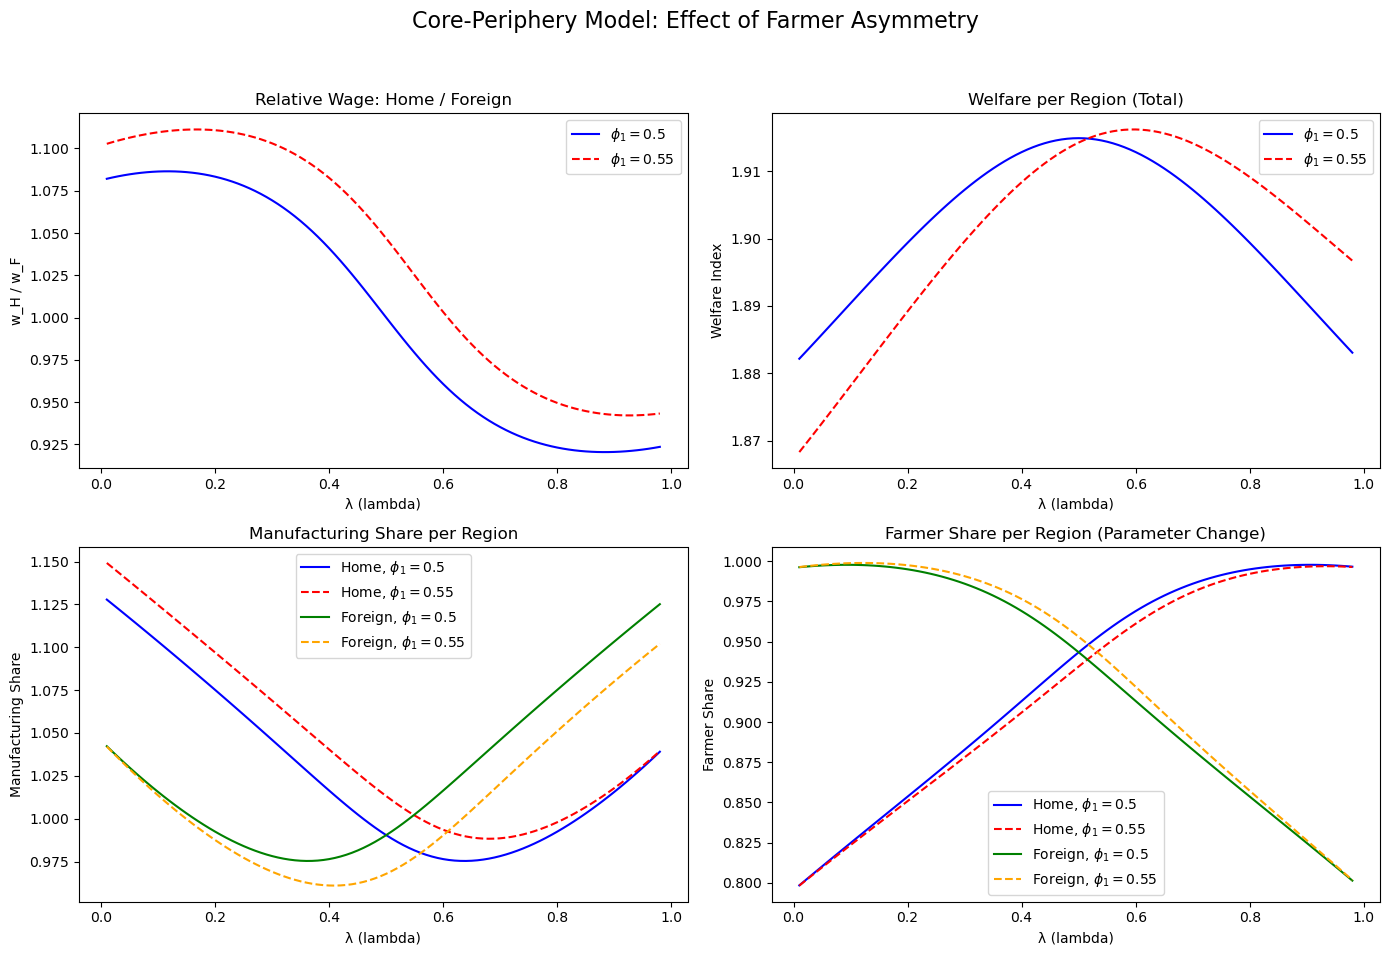

In [89]:
phi_temp=0.5
VWelfare_5, VRelative_5, VW_Man_H_5, VW_Man_F_5, VW_Farm_H_5, VW_Farm_F_5 = run_CP_model(lam_values,phi_temp,gam,rho,bet,delta,alp,eps,L, T)
phi_temp=0.55
VWelfare_55, VRelative_55, VW_Man_H_55, VW_Man_F_55, VW_Farm_H_55, VW_Farm_F_55 = run_CP_model(lam_values,phi_temp,gam,rho,bet,delta,alp,eps,L, T)
plot_CP_results(lam_values, 
                VRelative_5, VRelative_55,
                VWelfare_5, VWelfare_55,
                VW_Man_H_5, VW_Man_H_55,
                VW_Man_F_5, VW_Man_F_55,
                VW_Farm_H_5, VW_Farm_H_55,
                VW_Farm_F_5, VW_Farm_F_55)

<Figure size 640x480 with 0 Axes>

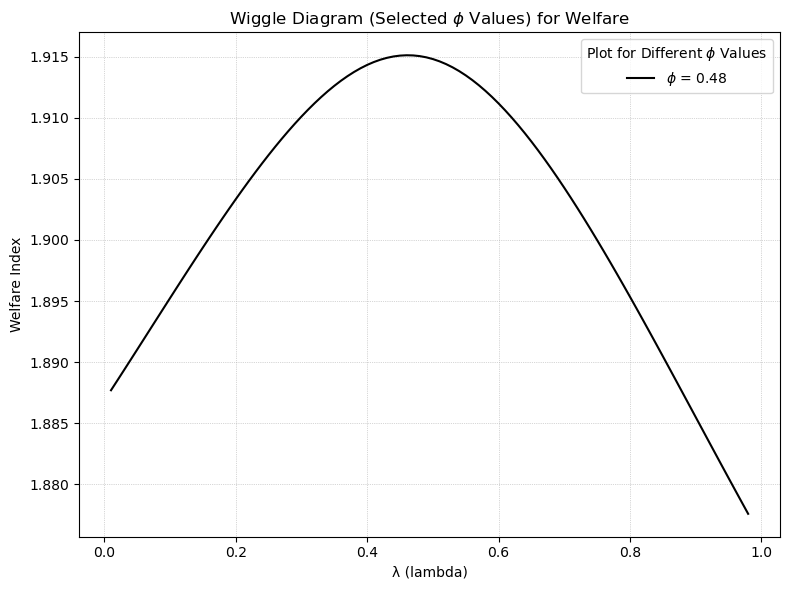

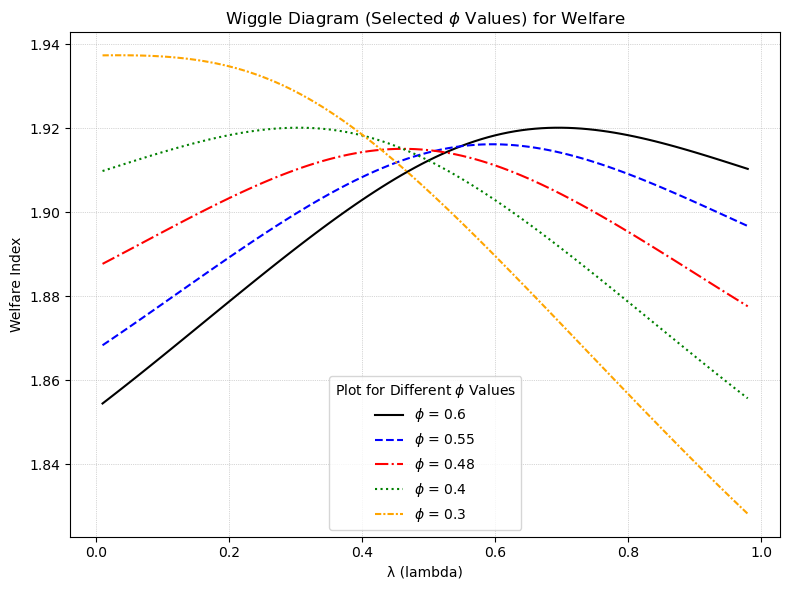

In [90]:
phi_min=30
phi_max=61 
phi_step=1
phi_div=100

phi_values = np.arange(phi_min, phi_max, phi_step) / phi_div

varying_values = phi_values
type_varying = 2 # in order to use the different phi values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(varying_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T,type_varying)

selected_phi_values = [0.48]
selected_phi_indices = [np.argmin(np.abs(phi_values - phi_sel)) for phi_sel in selected_phi_values]
plot_selected(lam_values, phi_values, Welfare_matrix, selected_phi_indices, 'Welfare Index', r'$\phi$', 'Welfare')


selected_phi_values = [0.6, 0.55, 0.48, 0.4, 0.3]
selected_phi_indices = [np.argmin(np.abs(phi_values - phi_sel)) for phi_sel in selected_phi_values]
plot_selected(lam_values, phi_values, Welfare_matrix, selected_phi_indices, 'Welfare Index', r'$\phi$', 'Welfare')


<div style="text-align:center">
  <h4>Exercise 3 The role of substitutability and market power</h4>
</div>
In our modern society, there is increasing discussion about the role of market power which is
associated with the ease of substitutability between manufacturing goods. Use the model to
discuss the implications of an increase in market power. Clearly motivate which parameter you
have changed and discuss the consequences for the spatial distribution of economic activity. 

To analyze the impact of increasing market power in the model, we vary the parameter $\epsilon$, which represents the elasticity of substitution between manufacturing goods. A lower $\epsilon$ implies that goods are less substitutable, giving firms greater pricing power and thus increasing market power.

By reducing $\epsilon$, we can examine how stronger market power affects the spatial distribution of economic activity and overall welfare. In this analysis, we decrease $\epsilon$ from its benchmark value of 5.0 to lower levels such as 4.0, 3.0 and 2.0, reflecting scenarios of gradually increasing market power.

C:\Users\yanni\AppData\Local\Temp\ipykernel_16492\1685271721.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  W1-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(Y1*I1**(eps-1)+T**(1-eps)*Y2*I2**(eps-1))**(1/eps),
C:\Users\yanni\AppData\Local\Temp\ipykernel_16492\1685271721.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  W2-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(T**(1-eps)*Y1*I1**(eps-1)+Y2*I2**(eps-1))**(1/eps),
C:\Users\yanni\AppData\Local\Temp\ipykernel_16492\1685271721.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  I1-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*W1**(1-eps)+(1-lam)*T**(1-eps)*W2**(1-eps))**(1/(1-eps)),
C:\Users\yanni\AppData\Local\Temp\ipykernel_16492\1685271721.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  I2-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*T**(1-eps)*W1**(1-eps)+(1-lam)*W2**(1-eps))**(1/(1-eps)))
c:\Users\yanni\anaconda3\lib\site-packages\scipy\optimize\_m

<Figure size 640x480 with 0 Axes>

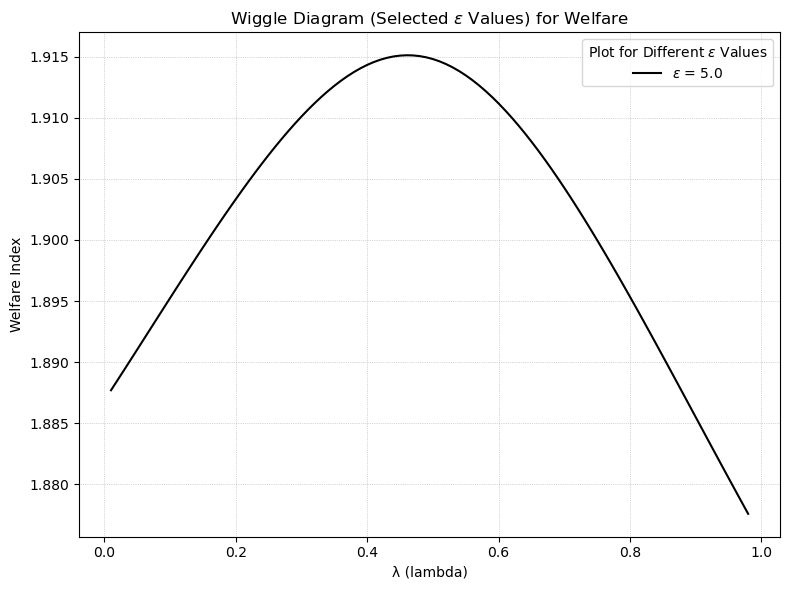

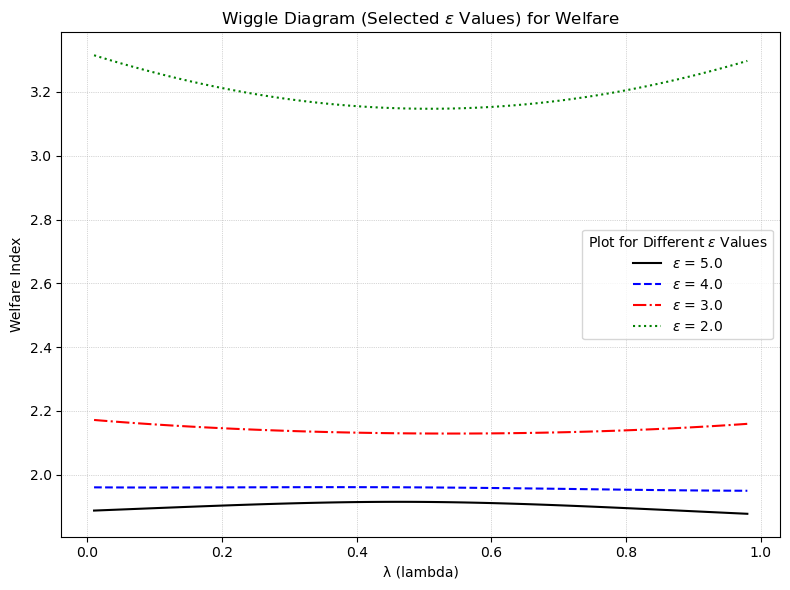

In [91]:
eps_min=100
eps_max=501
eps_step=1
eps_div=100

eps_values = np.arange(eps_min, eps_max, eps_step) / eps_div

varying_values = eps_values
type_varying = 3 # in order to use the different eps values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(varying_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T,type_varying)

selected_eps_values = [5]
selected_eps_indices = [np.argmin(np.abs(eps_values - eps_sel)) for eps_sel in selected_eps_values]
plot_selected(lam_values, eps_values, Welfare_matrix, selected_eps_indices, 'Welfare Index', r'$\epsilon$', 'Welfare')


selected_eps_values = [ 5.0, 4.0, 3.0, 2.0]  
selected_eps_indices = [np.argmin(np.abs(eps_values - eps_sel)) for eps_sel in selected_eps_values]
plot_selected(lam_values, eps_values, Welfare_matrix, selected_eps_indices, 'Welfare Index', r'$\epsilon$', 'Welfare')


<div style="text-align:center">
  <h4>Exercise 4. Determination of the break and sustain points</h4>
</div>
a. Characteristic for the core-periphery model is that multiple stable equilibria can arise. As is explained in the book, there is only a limited range of values for transport costs for which such multiple equilibria exist. This range is characterized by the so-called break and sustain points. You are asked to determine the break and sustain points for your parametrization of the model as precisely as possible (as above). Illustrate your answer graphically by depicting the equilibrium shares of mobile workers in region 1 (on the vertical axis) as a function of the transport cost (on the horizontal axis): this yields the socalled Tomahawk diagram (compare Figure 7.9 (3rd edition) or Figure 4.3 (2nd edition) in the book). Clearly mark all the stable and unstable equilibria. 

b. Also sketch the above relationship for the case in which farmers are not equally distributed over the regions, but instead there are relatively many farmers in region 1 (see question 2a).

In [96]:
def plot_tomahawk_diagram(lam_values, Relative, T, precision=0.0005):
    T_lambda = []
    T_Stab = []

    lamh_min = 0
    lamh_max = len(lam_values)

    for x in range(len(lam_values)):
        y = x - 1 if x > 0 else x  # avoid index -1
        
        if 1 - precision <= Relative[x] <= 1 + precision:
            axis = lam_values[x]
            if Relative[x] > Relative[y]:
                T_lambda.append(axis)
                T_Stab.append(0)  # Unstable
            else:
                T_lambda.append(axis)
                T_Stab.append(1)  # Stable

    # Corner equilibrium at lambda = 0
    if Relative[lamh_min] < 1:
        T_lambda.append(0.0)
        T_Stab.append(1)
    else:
        T_lambda.append(0.0)
        T_Stab.append(0)

    # Corner equilibrium at lambda = 1
    if Relative[lamh_max - 1] > 1:
        T_lambda.append(1.0)
        T_Stab.append(1)
    else:
        T_lambda.append(1.0)
        T_Stab.append(0)

    # Plotting for a given T
    plt.figure(figsize=(8, 5))

    for stab_val in [1, 0]:
        indices = [i for i, val in enumerate(T_Stab) if val == stab_val]
        marker = 'o' if stab_val == 1 else 'x'
        label = 'Stable' if stab_val == 1 else 'Unstable'
        plt.scatter([T] * len(indices), [T_lambda[i] for i in indices],
                    marker=marker, label=label, alpha=0.7)

    plt.xlabel('Transport Cost (T)')
    plt.ylabel('Share of Mobile Workers in Region 1 (λ)')
    plt.title(f'Tomahawk Diagram for T = {T}')
    plt.legend()
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()

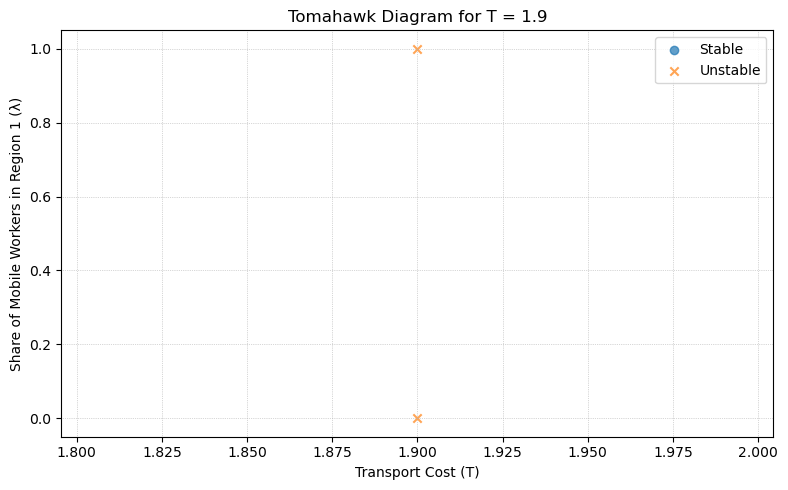

In [97]:
VWelfare_bench, VRelative_bench, VW_Man_H_bench, VW_Man_F_bench, VW_Farm_H_bench, VW_Farm_F_bench = run_CP_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L, T)
plot_tomahawk_diagram(lam_values, VRelative_bench, T,  precision=0.0005)